In [1]:
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats.stats import pearsonr
from scipy.stats.stats import f_oneway
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Using TensorFlow backend.
/home/natan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/natan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/natan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/natan/.local/lib/python3.6/site-packages/tensorflow/python/fra

## Importação dos dados
Nessa etapa estou importando os dados e trocando os valores de texto da coluna y para 1 quando for `yes` e 0 quando for `no`

In [2]:
bank = pd.read_csv('../dados/bank-full.csv', sep=';', decimal=',')

Transformando todas as variveis que possuem apenas dois valores em `1 | 0`

In [3]:
bank['y'] = bank['y'].apply(lambda x: 1 if x == 'yes' else 0)
bank['default'] = bank['default'].apply(lambda x: 1 if x == 'yes' else 0)
bank['housing'] = bank['housing'].apply(lambda x: 1 if x == 'yes' else 0)
bank['loan'] = bank['loan'].apply(lambda x: 1 if x == 'yes' else 0)

Descrição das colunas quantitavas utilizando algumas métricas estatisticas.

In [4]:
bank.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


## Pergunta 1: Qual profissão tem mais tendência a fazer um empréstimo ? De qual tipo ?

In [5]:
plot_base = bank.groupby(by='job').agg({ 'previous':'count', 'y':'sum' }).reset_index()
plot_base = plot_base.rename({ 'previous':'total' }, axis='columns')
plot_base['per_y'] = round(plot_base['y'] / plot_base['total'], 2) * 100

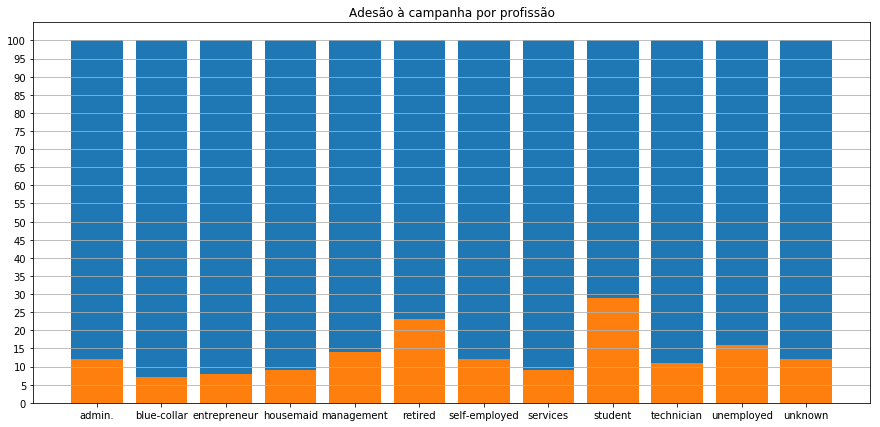

In [6]:
plt.figure(figsize=[15, 7])

plt.title('Adesão à campanha por profissão')
plt.bar(plot_base['job'], 100)
plt.bar(plot_base['job'], plot_base['per_y'])

plt.yticks(range(0, 105, 5))

plt.grid(True, axis='y')

plt.show()

In [7]:
f, p = f_oneway(
    bank[bank['job'] == 'management']['y'],
    bank[bank['job'] == 'technician']['y'],
    bank[bank['job'] == 'entrepreneur']['y'],
    bank[bank['job'] == 'blue-collar']['y'],
    bank[bank['job'] == 'unknown']['y'],
    bank[bank['job'] == 'retired']['y'],
    bank[bank['job'] == 'admin.']['y'],
    bank[bank['job'] == 'services']['y'],
    bank[bank['job'] == 'self-employed']['y'],
    bank[bank['job'] == 'unemployed']['y'],
    bank[bank['job'] == 'housemaid']['y'],
    bank[bank['job'] == 'student']['y'],
)

print('f-value: ' + str(round(f, 2)))
print('p-value: ' + str(round(p, 2)))

f-value: 77.42
p-value: 0.0


In [8]:
mc = MultiComparison(bank['y'], bank['job'])
result = mc.tukeyhsd()
 
print(result)

     Multiple Comparison of Means - Tukey HSD,FWER=0.05    
    group1        group2    meandiff  lower   upper  reject
-----------------------------------------------------------
    admin.     blue-collar  -0.0493  -0.0672 -0.0314  True 
    admin.     entrepreneur -0.0393  -0.0699 -0.0087  True 
    admin.      housemaid   -0.0341   -0.067 -0.0012  True 
    admin.      management   0.0155  -0.0025  0.0335 False 
    admin.       retired     0.1059   0.0797  0.1321  True 
    admin.    self-employed -0.0036  -0.0335  0.0263 False 
    admin.       services   -0.0332  -0.0549 -0.0115  True 
    admin.       student     0.1648   0.1278  0.2017  True 
    admin.      technician  -0.0115  -0.0302  0.0073 False 
    admin.      unemployed   0.033    0.0007  0.0653  True 
    admin.       unknown     -0.004   -0.067  0.059  False 
 blue-collar   entrepreneur   0.01    -0.019  0.0389 False 
 blue-collar    housemaid    0.0152  -0.0162  0.0465 False 
 blue-collar    management   0.0648   0.

>A partir do grafico a cima podemos constatar que as profissões `retired` e `student` aderem mais a campanha de marketing. Utilizando um teste estatistico para validar as diferenças tambem podemos dizer que a diferença na conversão da campanha para as duas profissões é estatisticamente relevante.

## 2. Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados ?

In [9]:
def correlation(base, col, value):
    query_string = col + ' == "' + value + '"'
    return round(pearsonr(base.query(query_string)['campaign'], base.query(query_string)['y'])[0], 2)

In [10]:
pearson_correlation = round(pearsonr(bank['campaign'], bank['y'])[0], 2)

print('Correlação entre o numero de contatos na campanha e o sucesso da campanha: ' + str(pearson_correlation))

Correlação entre o numero de contatos na campanha e o sucesso da campanha: -0.07


In [11]:
print('Correlação entre o numero de atendimentos e o sucesso da campanha por profissão\n')
for job in bank['job'].unique():
    print(job + ': ' + str(correlation(bank, 'job', job)))

Correlação entre o numero de atendimentos e o sucesso da campanha por profissão

management: -0.08
technician: -0.08
entrepreneur: 0.01
blue-collar: -0.05
unknown: -0.13
retired: -0.11
admin.: -0.07
services: -0.06
self-employed: -0.09
unemployed: -0.08
housemaid: -0.03
student: -0.08


In [12]:
print('Correlação entre o numero de atendimentos e o sucesso da campanha por estado civil\n')
for marital in bank['marital'].unique():
    print(marital + ': ' + str(correlation(bank, 'marital', marital)))

Correlação entre o numero de atendimentos e o sucesso da campanha por estado civil

married: -0.07
single: -0.08
divorced: -0.07


>Baseando-se nas correlações entre o numero de ligações e a adesão à campanhas não existe uma correlação forte entre o numero de ligações e o numero de campanhas. Mesmo olhando em profissões ou estados civis especificos.

## 3. Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão ?

In [13]:
call_base = bank.query('y == 1').groupby(by='campaign')['y'].sum().reset_index()
call_base = call_base.rename({ 'y':'qtd' }, axis=1)

call_base['cum_qtd'] = round(call_base['qtd'].cumsum() / call_base['qtd'].sum(), 4) * 100

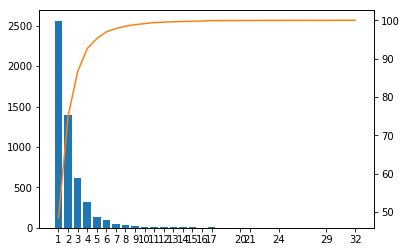

In [14]:
fig, ax1 = plt.subplots()

ax1.bar(call_base['campaign'], call_base['qtd'], color='C0')

ax2 = ax1.twinx()
ax2.plot(call_base['campaign'], call_base['cum_qtd'], color='C1')

plt.xticks(call_base['campaign'].unique())
plt.show()

In [15]:
bank.query('y == 1')['campaign'].describe()

count    5289.000000
mean        2.141047
std         1.921826
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        32.000000
Name: campaign, dtype: float64

In [16]:
call_base

,campaign,qtd,cum_qtd
0,1,2561,48.42
1,2,1401,74.91
2,3,618,86.59
3,4,317,92.59
4,5,139,95.22
5,6,92,96.96
6,7,47,97.84
7,8,32,98.45
8,9,21,98.85
9,10,14,99.11


>Baseando-se no grafico a cima e nas informações sobre a base, podemos notar que metade dos contatos com sucesso foram feitos na primeira tentativa e que 75% dos contatos com sucesso foram feitos até a segunda tentativa e que em média são necessários 2,14 contatos para se obter sucesso. Acredito que o numero de contatos ideal é de 1 a 2 contatos.

## 4. O resultado da campanha anterior tem relevância na campanha atual ?

In [17]:
previous_campaing_base = bank.groupby(by='poutcome').agg({ 'previous':'count', 'y':'sum' }).reset_index()
previous_campaing_base = previous_campaing_base.rename({ 'previous':'total' }, axis='columns')
previous_campaing_base['per_y'] = round(plot_base['y'] / plot_base['total'], 2) * 100

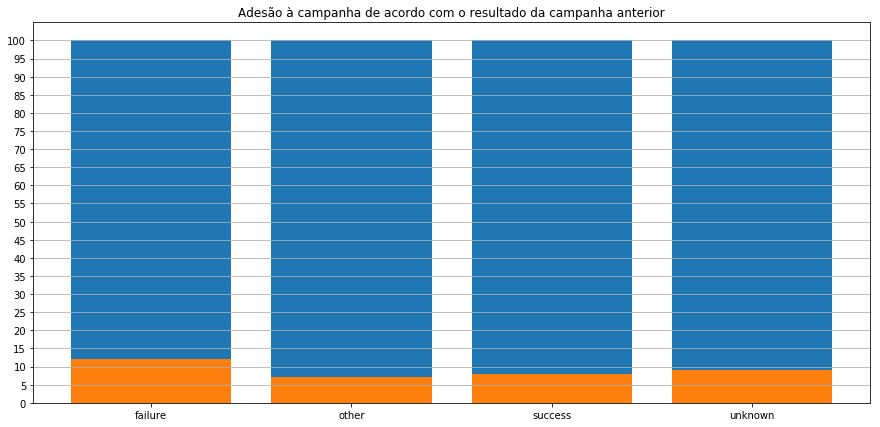

In [18]:
plt.figure(figsize=[15, 7])

plt.title('Adesão à campanha de acordo com o resultado da campanha anterior')
plt.bar(previous_campaing_base['poutcome'], 100)
plt.bar(previous_campaing_base['poutcome'], previous_campaing_base['per_y'])

plt.yticks(range(0, 105, 5))

plt.grid(True, axis='y')

plt.show()

In [19]:
f, p = f_oneway(
    bank[bank['poutcome'] == 'failure']['y'],
    bank[bank['poutcome'] == 'other']['y'],
    bank[bank['poutcome'] == 'success']['y'],
    bank[bank['poutcome'] == 'unknown']['y'],
)

print('f-value: ' + str(round(f, 2)))
print('p-value: ' + str(round(p, 2)))

f-value: 1621.18
p-value: 0.0


In [20]:
mc = MultiComparison(bank['y'], bank['poutcome'])
result = mc.tukeyhsd()
 
print(result)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1  group2 meandiff  lower   upper  reject
-----------------------------------------------
failure  other   0.0408   0.0193  0.0622  True 
failure success  0.5212   0.4981  0.5442  True 
failure unknown -0.0345  -0.0464 -0.0226  True 
 other  success  0.4804   0.4532  0.5076  True 
 other  unknown -0.0752   -0.094 -0.0565  True 
success unknown -0.5556  -0.5762  -0.535  True 
-----------------------------------------------


>Baseando-se no grafico vemos que quem possui o resultado de `failure` na campanha anterior possui uma taxa de conversão maior que os outros resultados e através do teste de hipotese podemos perceber que a diferença entre eles é estatiscamente relevante.

## 5. Qual o fator determinante para que o banco exija um seguro de crédito ?
PS: Como dito no arquivo [README](../README.md) para responder essa pergunta vamos utilizar a premissa de que os clientes que precisariam de um seguro de crédito são aqueles que ja não possuem crédito pré aprovado.

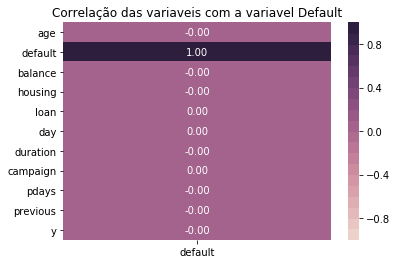

In [21]:
plt.title('Correlação das variaveis com a variavel Default')
sns.heatmap(
    round(bank.corr()[['default']]),
    annot=True, fmt='.2f', vmax=1, vmin=-1, cmap=sns.cubehelix_palette(20))

plt.show()

In [22]:
bank.groupby(by='default')['age'].count()

default
0    44396
1      815
Name: age, dtype: int64

Como existem poucos exemplos de pessoas com limite de crédito pré aprovado vamos utilizar a técnica de Under-Sampling para equilibrar a base.

In [23]:
X = bank[['age', 'balance', 'housing', 'loan', 'campaign', 'previous']]
y = bank['default']

In [24]:
sampler = RandomUnderSampler()
X_s, y_s = sampler.fit_sample(X, y)

Utilizando um Random Forest vamos identificar quais são as variaveis que melhor ajudam a entender quando se tem crédito pré-aprovado ou não.

In [25]:
rfc = RandomForestClassifier(n_estimators=4).fit(X_s, y_s)

In [26]:
print('R-squared: ' + str(round(rfc.score(X_s, y_s), 2)))
print('Precision: ' + str(round(accuracy_score(y_s, rfc.predict(X_s)),2)))
print('Recall: ' + str(round(recall_score(y_s, rfc.predict(X_s)),2)))
print('Precision: ' + str(round(precision_score(y_s, rfc.predict(X_s)),2)))

R-squared: 0.94
Precision: 0.94
Recall: 0.9
Precision: 0.98


In [27]:
pd.DataFrame({
    'features': ['age', 'balance', 'housing', 'loan', 'campaign', 'previous'],
    'importance': rfc.feature_importances_
}).sort_values(by='importance', ascending=False)

,features,importance
1,balance,0.642608
0,age,0.203861
4,campaign,0.082311
3,loan,0.025476
2,housing,0.024719
5,previous,0.021026


> A partir do metodo feature importance do Random forest podemos inferir que o saldo na conta do cliente é o fator mais determinate para que o banco exija um seguro de crédito

## 6. Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário ?

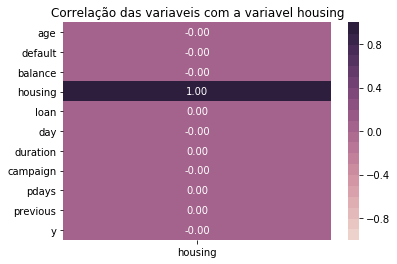

In [28]:
plt.title('Correlação das variaveis com a variavel housing')
sns.heatmap(
    round(bank.corr()[['housing']]),
    annot=True, fmt='.2f', vmax=1, vmin=-1, cmap=sns.cubehelix_palette(20))

plt.show()

In [29]:
bank.groupby(by='default')['housing'].count()

default
0    44396
1      815
Name: housing, dtype: int64

In [30]:
X = bank[['age', 'balance', 'default', 'loan', 'campaign', 'previous']]
y = bank['housing']

In [31]:
sampler = RandomUnderSampler()
X_s, y_s = sampler.fit_sample(X, y)

In [32]:
rfc = RandomForestClassifier(n_estimators=4).fit(X_s, y_s)

In [33]:
print('R-squared: ' + str(round(rfc.score(X_s, y_s), 2)))
print('Precision: ' + str(round(accuracy_score(y_s, rfc.predict(X_s)),2)))
print('Recall: ' + str(round(recall_score(y_s, rfc.predict(X_s)),2)))
print('Precision: ' + str(round(precision_score(y_s, rfc.predict(X_s)),2)))

R-squared: 0.89
Precision: 0.89
Recall: 0.83
Precision: 0.94


In [34]:
pd.DataFrame({
    'features': ['age', 'balance', 'default', 'loan', 'campaign', 'previous'],
    'importance': rfc.feature_importances_
}).sort_values(by='importance', ascending=False)

,features,importance
1,balance,0.694605
0,age,0.197976
4,campaign,0.065380
5,previous,0.032173
3,loan,0.006951
2,default,0.002914


> A partir do algoritmo de machine learning as princiapis características que ajudam a definir um clieque que possua crédito imobiliario são o saldo na conta e a idade